# Keras - LSTM Model

Sources:
1. https://machinelearningmastery.com/gentle-introduction-long-short-term-memory-networks-experts/
2. https://keras.io/api/layers/recurrent_layers/lstm/

Here I take advantage of the Keras Long Short Term Memory model in order to predict a time series (Bitcoin price).

In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv('/content/Bitcoin ($1) - MASTER.csv')

In [10]:
training_set=df.iloc[:1500,4:5].values
test_set=df.iloc[1500:,4:5].values

In [18]:
df

,Timestamp,Open,High,Low,Close
0,2014:07:17-00:00:00,613.0,628.9,610.0,623.1
1,2014:07:18-00:00:00,623.2,632.8,618.5,629.8
2,2014:07:19-00:00:00,629.8,632.1,625.0,630.4
3,2014:07:20-00:00:00,630.4,630.9,620.0,624.0
4,2014:07:21-00:00:00,624.0,626.9,615.0,620.1
...,...,...,...,...,...
2240,2021:02:20-00:00:00,55280.8,57462.4,53959.4,55855.3
2241,2021:02:21-00:00:00,55859.1,58285.5,55473.9,57419.6
2242,2021:02:22-00:00:00,57419.5,57499.9,47793.8,54073.5
2243,2021:02:23-00:00:00,54070.1,54128.8,44866.9,48845.6


In [21]:
len(test_set)

745

In [12]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 1500):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [20]:
X_train.shape[1]

60

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [14]:

dataset_train = df.iloc[:1500, 4:5]
dataset_test = df.iloc[1500:, 4:5]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 805):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(745, 60, 1)


In [16]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

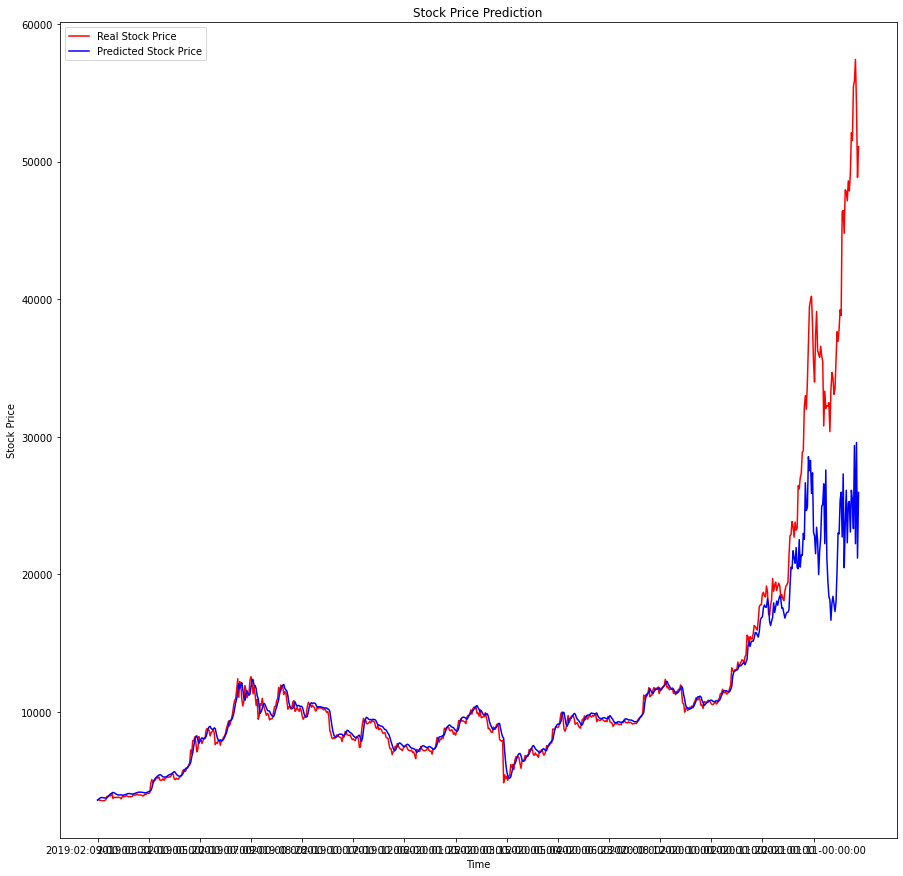

In [23]:
# Visualising the results
plt.figure(figsize=(15,15))
plt.plot(df.loc[1500:,'Timestamp'],dataset_test.values, color = 'red', label = 'Real Stock Price')
plt.plot(df.loc[1500:, 'Timestamp'],predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.xticks(np.arange(0,745,50))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()